# ANALISI DATI ESERCIZI 7.1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def autocorrelation(U):
    tmax = len(U)
    autoc = np.zeros(tmax)
    var_U = np.var(U)
    for t in range (tmax-1):
        norm = tmax - t
        sum1 = 0.
        sum2a = 0.
        sum2b = 0.
        for tprimo in range(tmax-t):
            sum1 += U[tprimo] * U[tprimo+t]
            sum2a += U[tprimo]
            sum2b += U[t+tprimo]

        autoc [t]  = (sum1 - sum2a*sum2b/norm) / var_U / norm
        if (t==0):
            autoc[0] = 1

    return autoc

In [3]:
def last_blocking_error(U, per_block):    
    n_blocks=int(len(U)/per_block)
    blocks=np.zeros(n_blocks)
    for i in range(n_blocks):
        blocks[i]=np.sum(U[i*per_block:(i+1)*per_block])
    blocks/=per_block
    blocks2=blocks*blocks
    
    blocks=np.sum(blocks)/n_blocks
    blocks2=np.sum(blocks2)/n_blocks
    err=np.sqrt((blocks2 - blocks**2)/(n_blocks))
        
    return err

Essendo molto dispendiosa dal punto di vista computazionale ho scelto di utilizzare solo i primi 10000 dati per calcolare la correlazione all'interno dei blocchi. 

## Solido

In [5]:
istant_energy_solid = np.loadtxt("MonteCarlo_NVT/Solid_result/corr_energy.txt")
istant_press_solid = np.loadtxt("MonteCarlo_NVT/Solid_result/corr_pressure.txt")

In [8]:
solid_press_correlation=autocorrelation(istant_press_solid[0:10000])
solid_energy_correlation=autocorrelation(istant_energy_solid[0:10000])

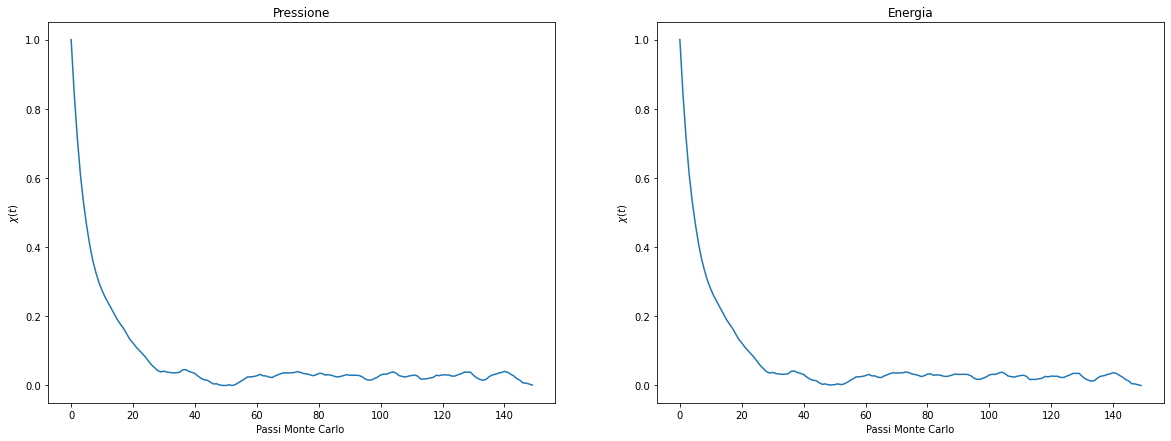

In [9]:
fig,ax = plt.subplots(1, 2, figsize=(20, 7))  ;

idx=150
x=np.arange(len(solid_press_correlation[:idx]))
ax[0].plot(solid_press_correlation[:idx])
ax[0].set_title("Pressione")
ax[0].set_xlabel("Passi Monte Carlo ")
ax[0].set_ylabel("$\chi(t)$")


x=np.arange(len(solid_energy_correlation[:idx]));
ax[1].plot(solid_energy_correlation[:idx]);
ax[1].set_title("Energia");
ax[1].set_xlabel("Passi Monte Carlo");
ax[1].set_ylabel("$\chi(t)$");

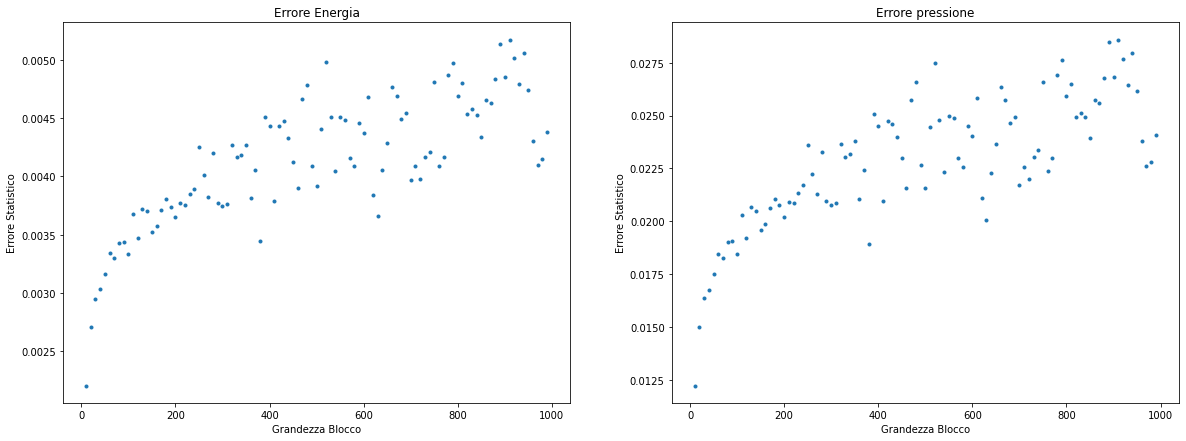

In [10]:
fig,ax = plt.subplots(1, 2, figsize=(20, 7))
#Energy error

errors=[]
value=[]
blk_size=[]  
for i in range (10, 1000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_solid, i))
ax[0].plot(blk_size, errors, linestyle="", marker=".")
ax[0].set_xlabel("Grandezza Blocco")
ax[0].set_ylabel("Errore Statistico")
ax[0].set_title("Errore Energia")


#istant_press_solid 
errors=[]
value=[]
blk_size=[]
    
for i in range (10, 1000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_solid, i))
ax[1].plot(blk_size, errors, linestyle="", marker=".")
ax[1].set_xlabel("Grandezza Blocco")
ax[1].set_ylabel("Errore Statistico")
ax[1].set_title("Errore pressione")

plt.show()



## Liquido

In [2]:
istant_energy_liquid = np.loadtxt("MonteCarlo_NVT/Liquid_result/corr_energy.txt")
istant_press_liquid = np.loadtxt("MonteCarlo_NVT/Liquid_result/corr_pressure.txt")

In [13]:
liquid_press_correlation=autocorrelation(istant_press_liquid[0:10000])
liquid_energy_correlation=autocorrelation(istant_energy_liquid[0:10000])

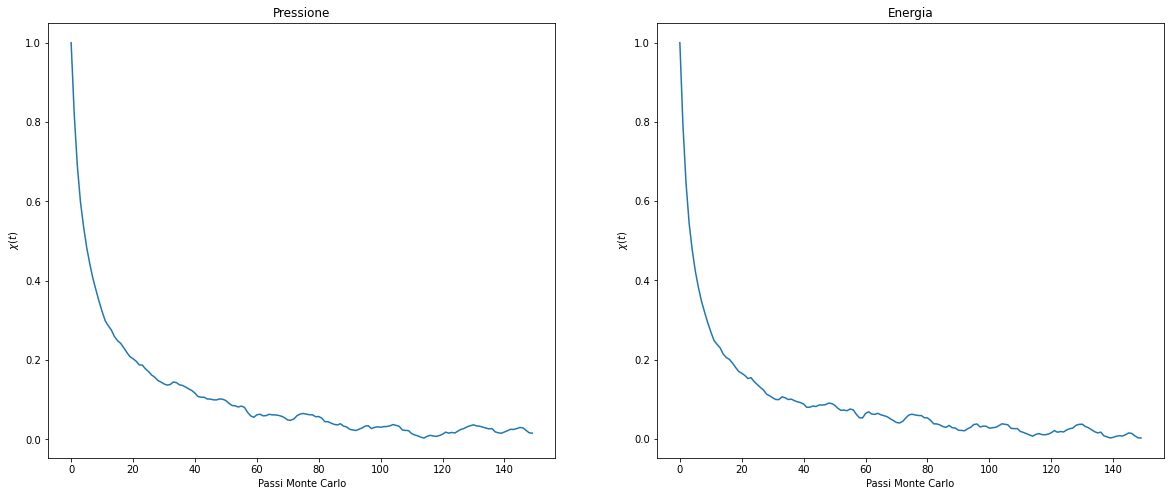

In [14]:
fig,ax = plt.subplots(1, 2, figsize=(20, 8))  ;

idx=150
x=np.arange(len(liquid_press_correlation[:idx]))
ax[0].plot(liquid_press_correlation[:idx])
ax[0].set_title("Pressione")
ax[0].set_xlabel("Passi Monte Carlo")
ax[0].set_ylabel("$\chi(t)$")


x=np.arange(len(liquid_energy_correlation[:idx]));
ax[1].plot(liquid_energy_correlation[:idx]);
ax[1].set_title("Energia");
ax[1].set_xlabel("Passi Monte Carlo");
ax[1].set_ylabel("$\chi(t)$");

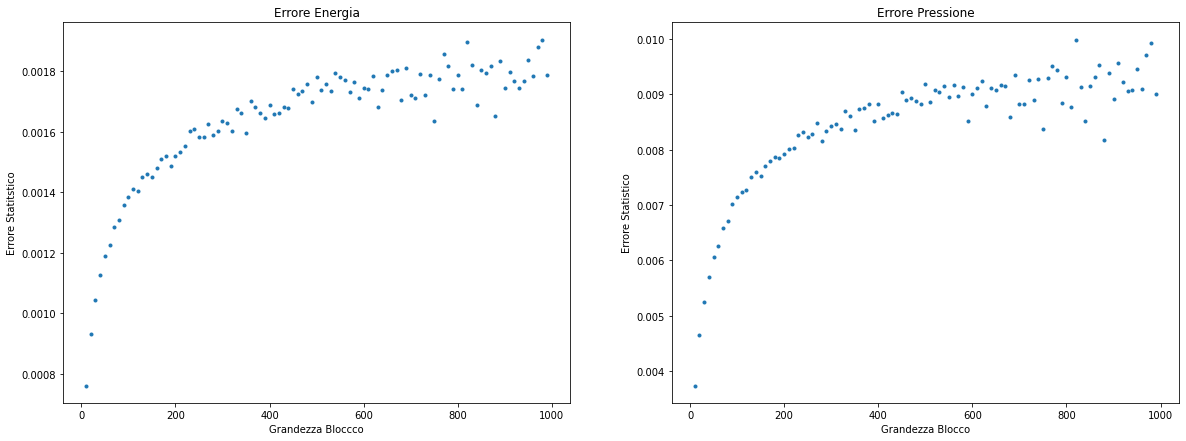

In [16]:
fig,ax = plt.subplots(1, 2, figsize=(20, 7))
#Energy error

errors=[]
value=[]
blk_size=[]  
for i in range (10, 1000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_liquid, i))
ax[0].plot(blk_size, errors, linestyle="", marker=".")
ax[0].set_xlabel("Grandezza Bloccco")
ax[0].set_ylabel("Errore Statitstico")
ax[0].set_title("Errore Energia")


#istant_press_solid 
errors=[]
value=[]
blk_size=[]
    
for i in range (10, 1000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_liquid, i))
ax[1].plot(blk_size, errors, linestyle="", marker=".")
ax[1].set_xlabel("Grandezza Blocco")
ax[1].set_ylabel("Errore Statistico")
ax[1].set_title("Errore Pressione")

plt.show()




## Gas

In [17]:
istant_energy_gas = np.loadtxt("MonteCarlo_NVT/Gas_result/corr_energy.txt")
istant_press_gas = np.loadtxt("MonteCarlo_NVT/Gas_result/corr_pressure.txt")

In [18]:
gas_press_correlation=autocorrelation(istant_press_gas[0:10000])
gas_energy_correlation=autocorrelation(istant_energy_gas[0:1000])

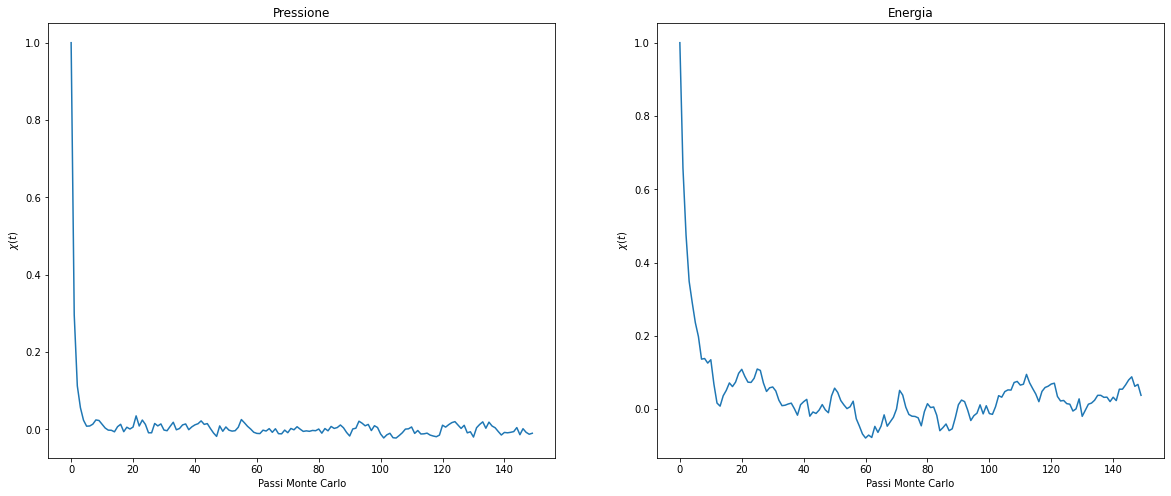

In [19]:
fig,ax = plt.subplots(1, 2, figsize=(20, 8))  ;

idx=150
x=np.arange(len(gas_press_correlation[:idx]))
ax[0].plot(gas_press_correlation[:idx])
ax[0].set_title("Pressione")
ax[0].set_xlabel("Passi Monte Carlo")
ax[0].set_ylabel("$\chi(t)$")


x=np.arange(len(gas_energy_correlation[:idx]));
ax[1].plot(gas_energy_correlation[:idx]);
ax[1].set_title("Energia");
ax[1].set_xlabel("Passi Monte Carlo");
ax[1].set_ylabel("$\chi(t)$");

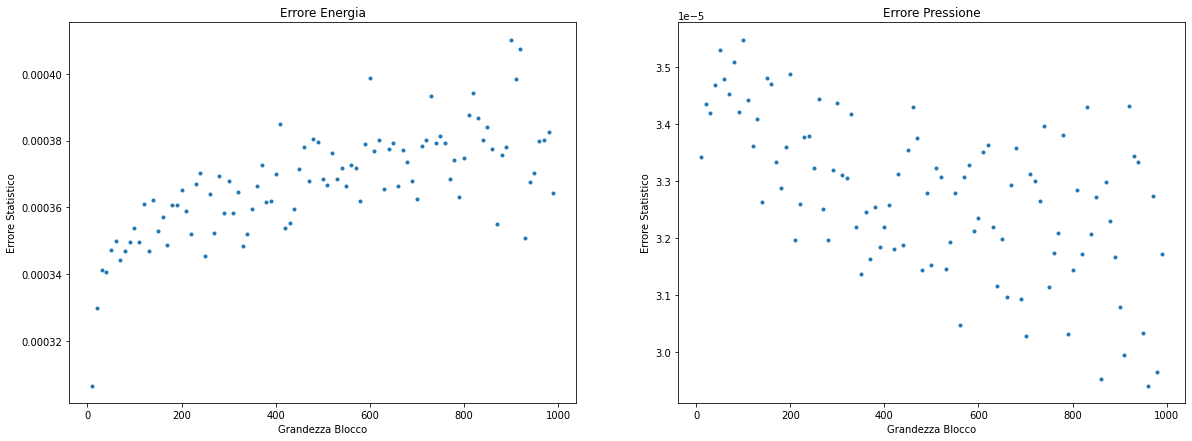

In [20]:
fig,ax = plt.subplots(1, 2, figsize=(20, 7))
#Energy error

errors=[]
value=[]
blk_size=[]  
for i in range (10, 1000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_gas, i))
ax[0].plot(blk_size, errors, linestyle="", marker=".")
ax[0].set_xlabel("Grandezza Blocco")
ax[0].set_ylabel("Errore Statistico")
ax[0].set_title("Errore Energia")


#istant_press_solid 
errors=[]
value=[]
blk_size=[]
    
for i in range (10, 1000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_gas, i))
ax[1].plot(blk_size, errors, linestyle="", marker=".")
ax[1].set_xlabel("Grandezza Blocco")
ax[1].set_ylabel("Errore Statistico")
ax[1].set_title("Errore Pressione")

plt.show()




## Esercizio 7.4 (ARGON)


In [4]:
#physical parameters

k_boltzman=1.38064852*1E-23

#parameters for argon
sigma_argon = 0.34    
epsilon_boltzman_argon = 120  #e/kB
epsilon_argon=epsilon_boltzman_argon*k_boltzman
sigma_si_argon=sigma_argon*1E-9
mass_argon = 39.948*1.66054*1E-27

## Gas

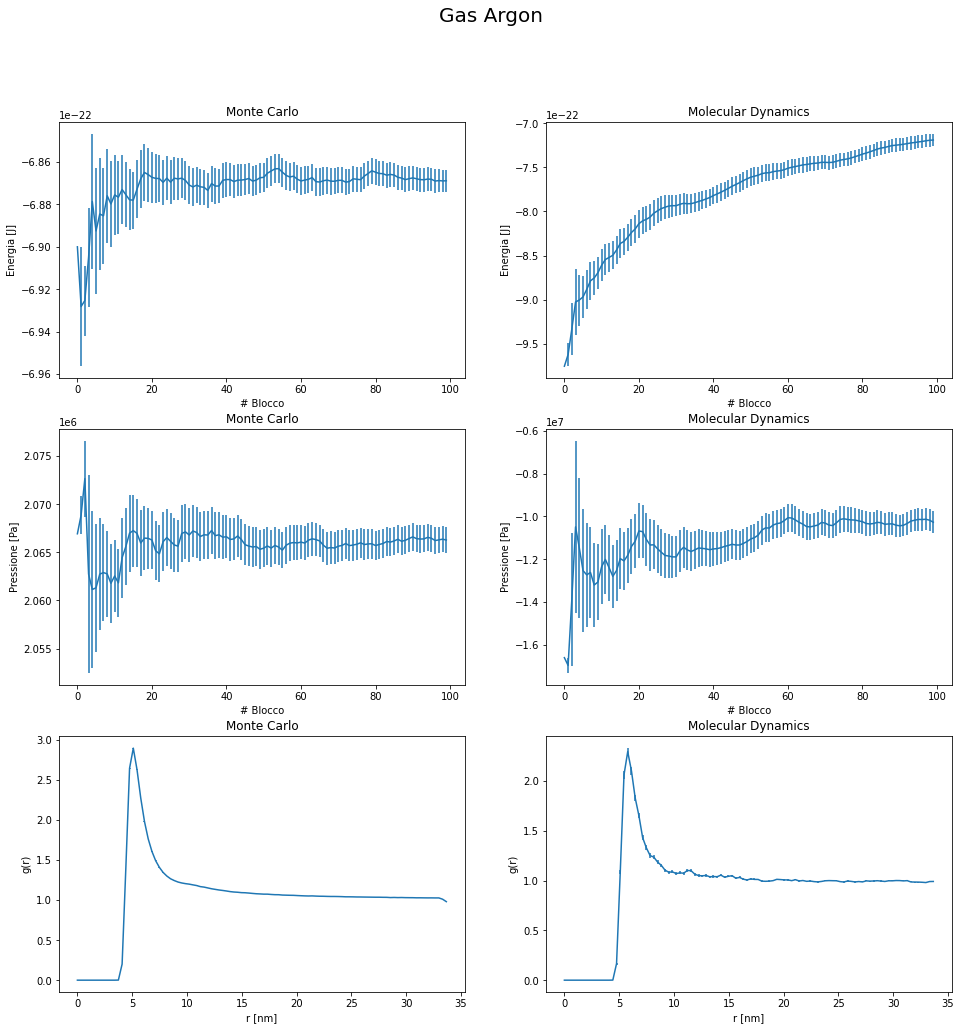

In [16]:
g = np.loadtxt("MonteCarlo_NVT/Gas_result/output.gave.0")
energy = np.loadtxt("MonteCarlo_NVT/Gas_result/output.epot.0")
pres =np.loadtxt("MonteCarlo_NVT/Gas_result/output.press.0")

g_mol = np.loadtxt("MolecularDynamics_NVE/Gas_result/output_gave.out")
energy_mol=np.loadtxt("MolecularDynamics_NVE/Gas_result/ave.epot.out")
pres_mol=np.loadtxt("MolecularDynamics_NVE/Gas_result/ave.pres.out")

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Gas Argon", fontsize=20)

#energy
ax[0][0].errorbar(range(len(energy)), energy[:,2]*epsilon_argon, yerr=energy[:,3]*epsilon_argon)
ax[0][0].set_ylabel("Energia [J]")
ax[0][0].set_xlabel("# Blocco")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(len(energy_mol)), energy_mol[:,0]*epsilon_argon, yerr=energy_mol[:,1]*epsilon_argon)
ax[0][1].set_ylabel("Energia [J]")
ax[0][1].set_xlabel("# Blocco")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(len(pres)), pres[:,2]*epsilon_argon/(sigma_si_argon**3), yerr=pres[:,3]*epsilon_argon/(sigma_si_argon**3))
ax[1][0].set_ylabel("Pressione [Pa]")
ax[1][0].set_xlabel("# Blocco")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(len(pres_mol)), pres_mol[:,0]*epsilon_argon/(sigma_si_argon**3), yerr=pres_mol[:,1]*epsilon_argon/(sigma_si_argon**3))
ax[1][1].set_ylabel("Pressione [Pa]")
ax[1][1].set_xlabel("# Blocco")
ax[1][1].set_title("Molecular Dynamics")

ax[2][0].errorbar(np.arange(0,100)*sigma_argon,g[:,2],yerr=g[:,3])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(np.arange(0,100)*sigma_argon,g_mol[:,0],yerr=g_mol[:,1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");

## Liquid

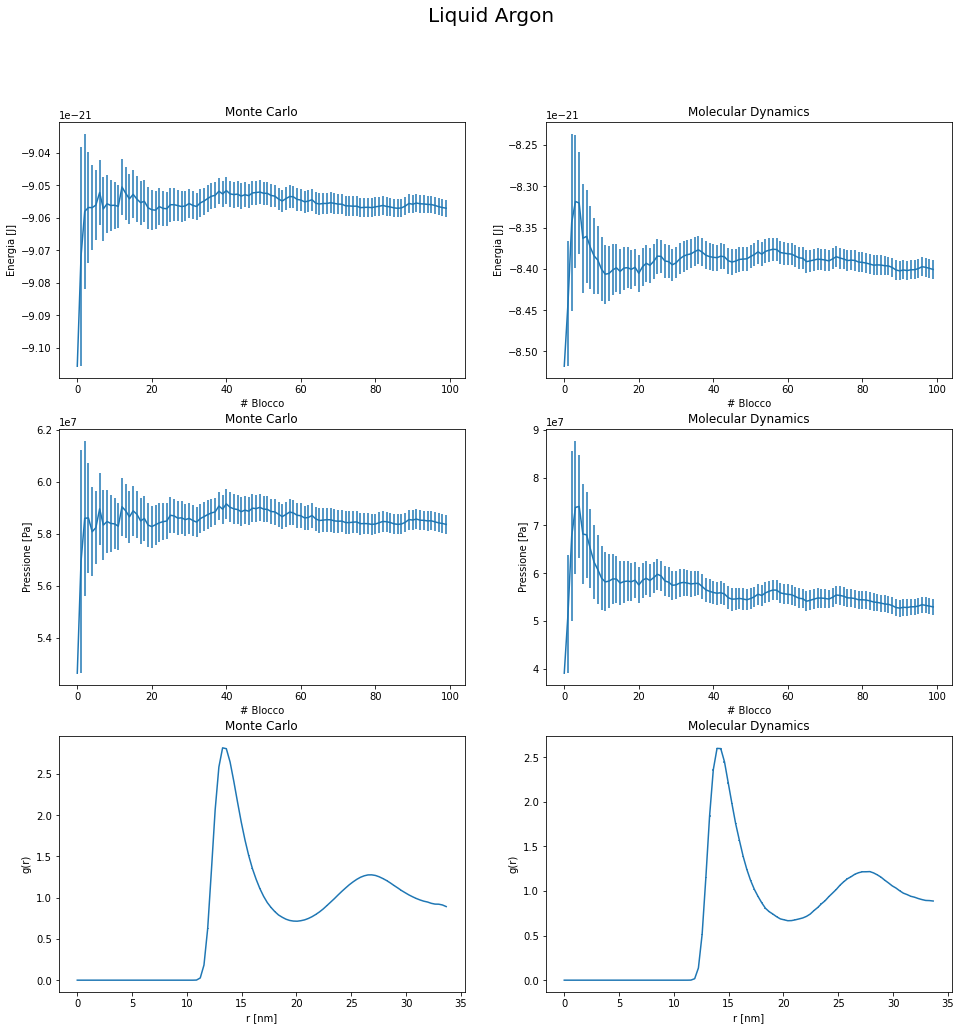

In [38]:
g = np.loadtxt("MonteCarlo_NVT/Liquid_result/output.gave.0")
energy = np.loadtxt("MonteCarlo_NVT/Liquid_result/output.epot.0")
pres =np.loadtxt("MonteCarlo_NVT/Liquid_result/output.press.0")

g_mol = np.loadtxt("MolecularDynamics_NVE/Liquid_result/output_gave.out")
energy_mol=np.loadtxt("MolecularDynamics_NVE/Liquid_result/ave.epot.out")
pres_mol=np.loadtxt("MolecularDynamics_NVE/Liquid_result/ave.pres.out")

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Liquid Argon", fontsize=20)

#energy
ax[0][0].errorbar(range(len(energy)), energy[:,2]*epsilon_argon, yerr=energy[:,3]*epsilon_argon)
ax[0][0].set_ylabel("Energia [J]")
ax[0][0].set_xlabel("# Blocco")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(len(energy_mol)), energy_mol[:,0]*epsilon_argon, yerr=energy_mol[:,1]*epsilon_argon)
ax[0][1].set_ylabel("Energia [J]")
ax[0][1].set_xlabel("# Blocco")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(len(pres)), pres[:,2]*epsilon_argon/(sigma_si_argon**3), yerr=pres[:,3]*epsilon_argon/(sigma_si_argon**3))
ax[1][0].set_ylabel("Pressione [Pa]")
ax[1][0].set_xlabel("# Blocco")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(len(pres_mol)), pres_mol[:,0]*epsilon_argon/(sigma_si_argon**3), yerr=pres_mol[:,1]*epsilon_argon/(sigma_si_argon**3))
ax[1][1].set_ylabel("Pressione [Pa]")
ax[1][1].set_xlabel("# Blocco")
ax[1][1].set_title("Molecular Dynamics")

ax[2][0].errorbar(np.arange(0,100)*sigma_argon,g[:,2],yerr=g[:,3])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(np.arange(0,100)*sigma_argon,g_mol[:,0],yerr=g_mol[:,1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");

## Solid

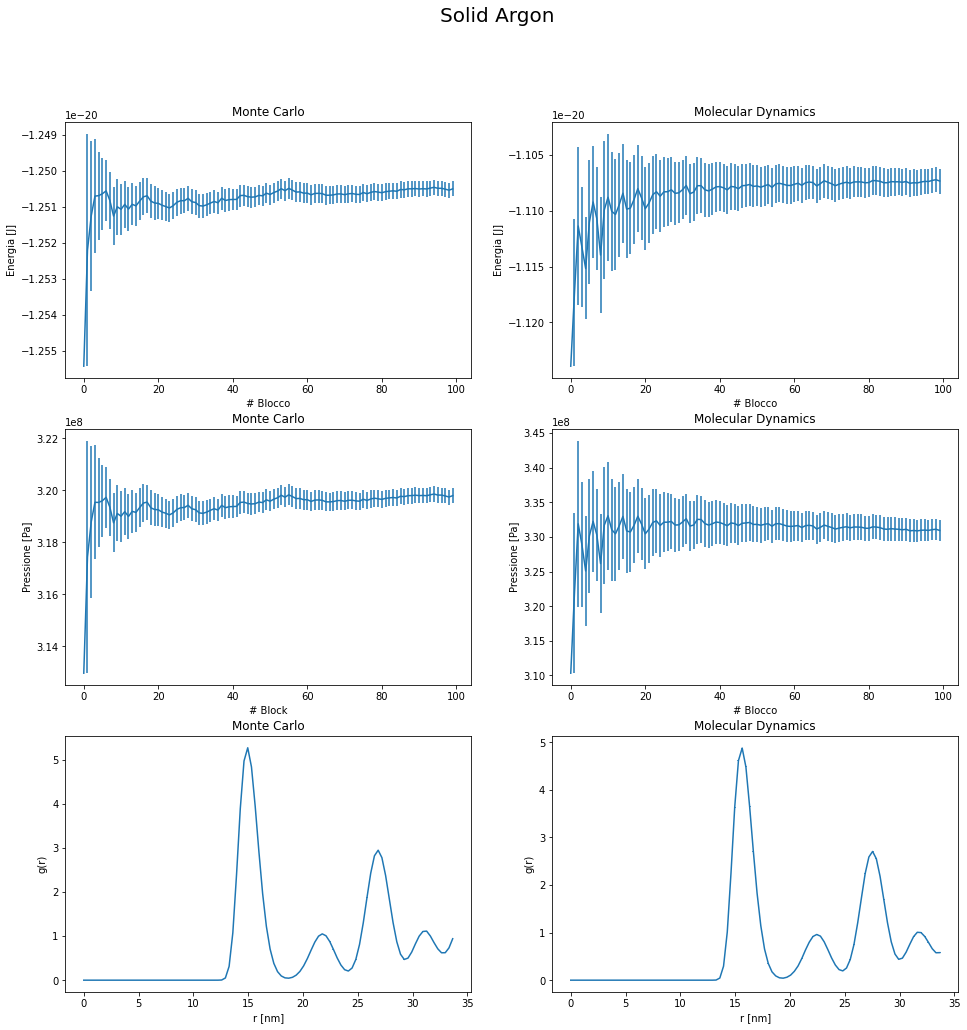

In [39]:
g = np.loadtxt("MonteCarlo_NVT/Solid_result/output.gave.0")
energy = np.loadtxt("MonteCarlo_NVT/Solid_result/output.epot.0")
pres =np.loadtxt("MonteCarlo_NVT/Solid_result/output.press.0")

g_mol = np.loadtxt("MolecularDynamics_NVE/Solid_result/output_gave.out")
energy_mol=np.loadtxt("MolecularDynamics_NVE/Solid_result/ave.epot.out")
pres_mol=np.loadtxt("MolecularDynamics_NVE/Solid_result/ave.pres.out")

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Solid Argon", fontsize=20)

#energy
ax[0][0].errorbar(range(len(energy)), energy[:,2]*epsilon_argon, yerr=energy[:,3]*epsilon_argon)
ax[0][0].set_ylabel("Energia [J]")
ax[0][0].set_xlabel("# Blocco")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(len(energy_mol)), energy_mol[:,0]*epsilon_argon, yerr=energy_mol[:,1]*epsilon_argon)
ax[0][1].set_ylabel("Energia [J]")
ax[0][1].set_xlabel("# Blocco")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(len(pres)), pres[:,2]*epsilon_argon/(sigma_si_argon**3), yerr=pres[:,3]*epsilon_argon/(sigma_si_argon**3))
ax[1][0].set_ylabel("Pressione [Pa]")
ax[1][0].set_xlabel("# Block")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(len(pres_mol)), pres_mol[:,0]*epsilon_argon/(sigma_si_argon**3), yerr=pres_mol[:,1]*epsilon_argon/(sigma_si_argon**3))
ax[1][1].set_ylabel("Pressione [Pa]")
ax[1][1].set_xlabel("# Blocco")
ax[1][1].set_title("Molecular Dynamics")

ax[2][0].errorbar(np.arange(0,100)*sigma_argon,g[:,2],yerr=g[:,3])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(np.arange(0,100)*sigma_argon,g_mol[:,0],yerr=g_mol[:,1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");